### Задание 1: 
Посчитайте частные производные функций
(как обычно, необходимо решение на бумажке или в LaTeX и на scipy):

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$, а для этой функции также градиент в точке $(1,2)$

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

**Решение:**  

1) $f(x,y)=2x^2y^3 + \frac{1}{x} + y^2x + 7$  
$\frac{\partial f}{\partial x} = 4xy^3 - \frac{1}{x^2} + y^2$  
$\frac{\partial f}{\partial y} = 6x^2y^2 + 2yx$  
$\nabla f = (4xy^3 - \frac{1}{x^2} + y^2, 6x^2y^2 + 2yx)$  
$\nabla f_{(1,2)} = (4 * 1 * 2^3 - \frac{1}{1^2} + 2^2, 6*1^2*2^2 + 2*2*1) = (35, 28)$  
  
2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$  
$\frac{\partial f}{\partial x} = 2xy - ycos(xy) - 2xsin(x^2)$  
$\frac{\partial f}{\partial y} = x^2 - xcos(xy) + 6$  

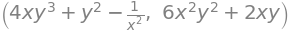

In [1]:
from sympy import diff, symbols, cos, sin, init_session

init_session(quiet=True)

x, y = symbols('x y')
init_printing()

f = 2 * x ** 2 * y ** 3 + 1 / x + y ** 2 * x + 7
diff(f, x), diff(f, y)

In [2]:
def f_dx(x, y):
    return 4. * x * y ** 3 + y ** 2 - 1 / x ** 2

def f_dy(x, y):
    return 6. * x ** 2 * y ** 2 + 2 * x * y

x, y = (1, 2)
print(f"Градиент f(x, y) в точке ({x}, {y}) равен ({f_dx(x, y)}, {f_dy(x, y)}).")

Градиент f(x, y) в точке (1, 2) равен (35.0, 28.0).


In [3]:
x, y = symbols('x y')
init_printing()

f = x ** 2 * y - sin(x * y) + cos(x ** 2) + 6 * y
diff(f, x), diff(f, y)

### Задание 2:

Градиентный спуск своими руками

**Решение:**  

$f = x_1^2 + x_2^2$  
$\frac{\partial f}{\partial x_1} = 2x_1$  
$\frac{\partial f}{\partial x_2} = 2x_2$   
$\nabla f = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}) = (2x_1, 2x_2)$

In [4]:
import numpy as np
from scipy.optimize import approx_fprime

def f(x):
    return x[0]**2 + x[1]**2

x = np.array([100, 200])
learning_rate = 0.1

for i in range(100):
    # Calculate gradient
    grad = np.array([x[0] * 2, x[1] * 2])
    
    # Update x with gradient
    x = x - grad * learning_rate
    
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [2.03703598e-08 4.07407195e-08]
Значение функции в минимуме:  2.0747577844404994e-15


Проверка с помощью встроенной функции numpy: 

In [5]:
from scipy.optimize import minimize

x = np.array([100, 200])
eps = np.sqrt(np.finfo(float).eps)

for i in range(100):
    # Calculate gradient
    grad = approx_fprime(x, f, [eps, eps])
    
    # Update x with gradient
    x = x - grad * learning_rate

print("С использованием функции approx_fprime()")
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

x = np.array([100, 200])
min_x = minimize(f, x, method='nelder-mead', options={'xtol': eps}).x
print("С использованием функции minimize()")
print("Минимум достигается в: ", min_x)
print("Значение функции в минимуме: ", f(min_x))

С использованием функции approx_fprime()
Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15
С использованием функции minimize()
Минимум достигается в:  [ 3.31391559e-09 -1.82888492e-09]
Значение функции в минимуме:  1.4326856592347756e-17
